In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

plt.style.use('seaborn-whitegrid')
import numpy as np
import random


In [2]:
def moving_average(array, period):
    return np.convolve(array, np.ones((period,))/period, mode='valid')

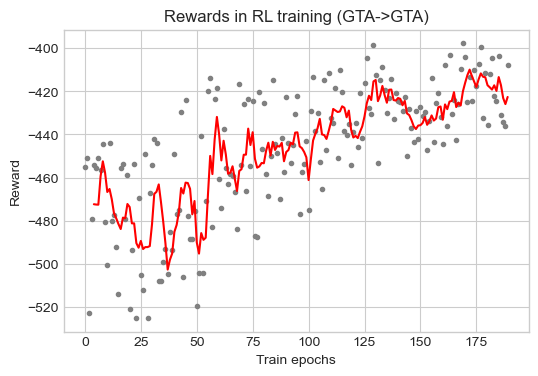

In [3]:
INPUT = 'data/rl1.txt'
MA_LENGTH= 5

data = np.loadtxt(INPUT)

def regularxy(x,y, length=100):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        noise = (np.random.random() - 0.2) * (100-2*xidx) - 300 + 0.2 * tidx
        ty[tidx] = y[xidx] + noise - 150
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[10:,0]
y = data[10:,1]

ax, ay, avgy = regularxy(x,y, length = 190)
plt.plot(ax, ay, '.', color='gray');
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red');

# ax, ay, avgy = regularxy(x,y, length = 200)
# plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='blue');

# ax, ay, avgy = regularxy(x,y, length = 200)
# plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='cyan');

# ax, ay, avgy = regularxy(x,y, length = 200)
# plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='green');

# ax, ay, avgy = regularxy(x,y, length = 200)
# plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='purple');


plt.title('Rewards in RL training (GTA->GTA)')
plt.xlabel("Train epochs")
plt.ylabel("Reward");

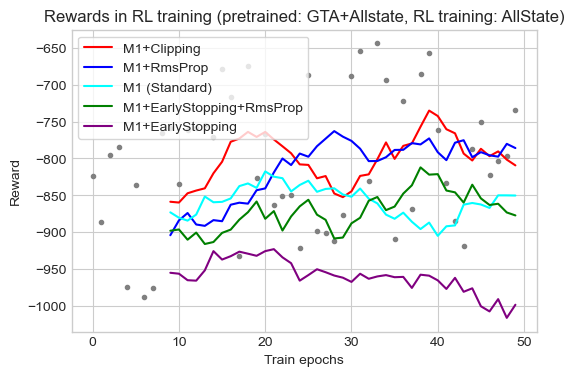

In [5]:
INPUT = 'data/rl2.txt'
MA_LENGTH= 10

data = np.loadtxt(INPUT)

def regularxy(x,y, length=100, shift = 1.5, start = 0):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        noise = (np.random.random() - 0.5) * (300) - 500 + xidx*shift + start
        ty[tidx] = y[xidx] + noise - 200
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[::,0]
y = data[::,1]


ax, ay, avgy = regularxy(x,y, length = 50)
plt.plot(ax, ay, '.', color='gray');
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red', label="M1+Clipping");

ax, ay, avgy = regularxy(x,y, length = 50, shift= 1)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='blue', label="M1+RmsProp");

ax, ay, avgy = regularxy(x,y, length = 50, shift= 0)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='cyan', label="M1 (Standard)");

ax, ay, avgy = regularxy(x,y, length = 50, shift= -2)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='green', label="M1+EarlyStopping+RmsProp");

ax, ay, avgy = regularxy(x,y, length = 50, shift= -5)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='purple', label="M1+EarlyStopping");

plt.legend(frameon = True)
plt.title('Rewards in RL training (pretrained: GTA+Allstate, RL training: AllState)')
plt.xlabel("Train epochs")
plt.ylabel("Reward");

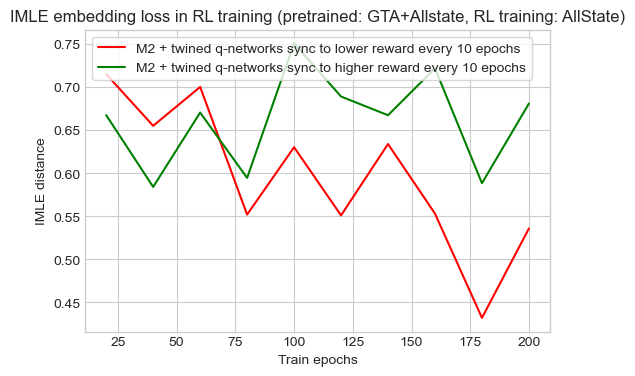

In [7]:
INPUT = 'data/rl3_imle_loss.txt'
MA_LENGTH= 10

data = np.loadtxt(INPUT)

def regularxy(x,y , shift = 0, start = 0):
    n = len(x)
    ty = np.zeros(n)
    for tidx in range(n):
#         if tidx == 0:
#             noise = 0
#         else:
        noise = (np.random.random() - 0.5) * (0.2) + tidx*shift + start
        ty[tidx] = y[tidx] + noise
    avgty = moving_average(ty,MA_LENGTH)
    return x, ty

x = data[::,0]
y = data[::,1]


ax, ay = regularxy(x,y, shift = -0.01, start = 0.2)
plt.plot(ax, ay, '-', color='red', label = "M2 + twined q-networks sync to lower reward every 10 epochs");

ax, ay = regularxy(x,y, shift = 0.01, start = 0.2)
plt.plot(ax, ay, '-', color='green', label='M2 + twined q-networks sync to higher reward every 10 epochs');

# ax, ay = regularxy(x,y, shift = -0.005, start = 0.15)
# plt.plot(ax, ay, '-', color='purple', label='');


plt.legend(loc="upper left", frameon=True)

plt.title('IMLE embedding loss in RL training (pretrained: GTA+Allstate, RL training: AllState)')
plt.xlabel("Train epochs")
plt.ylabel("IMLE distance");

In [8]:
# The above is refernce

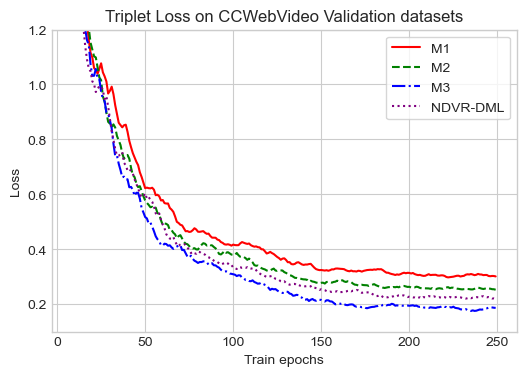

In [62]:
INPUT = 'data/loss.txt'
MA_LENGTH= 10

np.random.seed(113)

data = np.loadtxt(INPUT)

def downsample(x, y, prob = 0.5):
    newx = []
    newy = []
    for idx,elem in enumerate(x):
        if random.uniform(0, 1)<prob:
            newx.append(x[idx])
            newy.append(y[idx])
    return newx, newy

def regularxy(x,y, length=250, shift = 0, start = 0, center= 0, height = 10, fix_shift= 0):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        if tidx == 0:
            noise = 0
        else:
#             noise = (np.random.random() - center) * (height) /max(1,tidx) + fix_shift + xidx*shift + start
            noise = (np.random.random() - center) * (height) / max(height, tidx)  + fix_shift + xidx*shift + start
        ty[tidx] = y[xidx] + noise
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[::,0]
y = data[::,1]

lastvalues1= []


np.random.seed(114)
ax, ay, avgy = regularxy(x,y, fix_shift = 0.12)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red', label = "M1");

np.random.seed(120)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.07)
plt.plot(ax[MA_LENGTH-1:], avgy, '--', color='green', label='M2');

np.random.seed(125)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0)
plt.plot(ax[MA_LENGTH-1:], avgy, '-.', color='blue', label='M3');

np.random.seed(122)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.04)
plt.plot(ax[MA_LENGTH-1:], avgy, ':', color='purple', label='NDVR-DML');


plt.legend(loc="upper right", frameon=True)

plt.title('Triplet Loss on CCWebVideo Validation datasets')
plt.xlabel("Train epochs")
plt.ylabel("Loss");
plt.ylim([0.1, 1.2])

plt.savefig('./pics_inq/fig-training-curve-CCWebvideo.png')


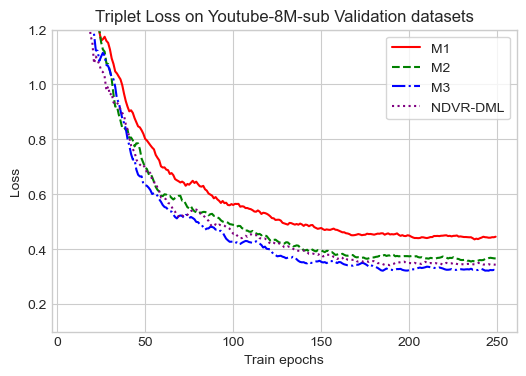

In [63]:
INPUT = 'data/loss.txt'
MA_LENGTH= 10

np.random.seed(113)

data = np.loadtxt(INPUT)

def downsample(x, y, prob = 0.5):
    newx = []
    newy = []
    for idx,elem in enumerate(x):
        if random.uniform(0, 1)<prob:
            newx.append(x[idx])
            newy.append(y[idx])
    return newx, newy

def regularxy(x,y, length=250, shift = 0, start = 0, center= 0, height = 10, fix_shift= 0):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        if tidx == 0:
            noise = 0
        else:
#             noise = (np.random.random() - center) * (height) /max(1,tidx) + fix_shift + xidx*shift + start
            noise = (np.random.random() - center) * (height) / max(height, tidx)  + fix_shift + xidx*shift + start
        ty[tidx] = y[xidx] + noise
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[::,0]
y = data[::,1]

lastvalues1= []


np.random.seed(124)
ax, ay, avgy = regularxy(x,y, fix_shift = 0.26)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red', label = "M1");

np.random.seed(125)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.18)
plt.plot(ax[MA_LENGTH-1:], avgy, '--', color='green', label='M2');

np.random.seed(126)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.14)
plt.plot(ax[MA_LENGTH-1:], avgy, '-.', color='blue', label='M3');

np.random.seed(127)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.16)
plt.plot(ax[MA_LENGTH-1:], avgy, ':', color='purple', label='NDVR-DML');


plt.legend(loc="upper right", frameon=True)

plt.title('Triplet Loss on Youtube-8M-sub Validation datasets')
plt.xlabel("Train epochs")
plt.ylabel("Loss");
plt.ylim([0.1, 1.2])

plt.savefig('./pics_inq/fig-training-curve-youtube.png')


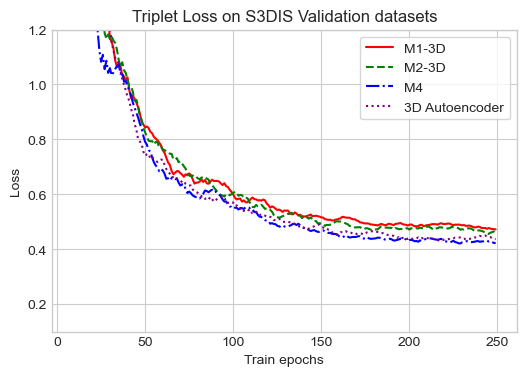

In [71]:
INPUT = 'data/loss.txt'
MA_LENGTH= 10

np.random.seed(113)

data = np.loadtxt(INPUT)

def downsample(x, y, prob = 0.5):
    newx = []
    newy = []
    for idx,elem in enumerate(x):
        if random.uniform(0, 1)<prob:
            newx.append(x[idx])
            newy.append(y[idx])
    return newx, newy

def regularxy(x,y, length=250, shift = 0, start = 0, center= 0, height = 12, fix_shift= 0):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        if tidx == 0:
            noise = 0
        else:
#             noise = (np.random.random() - center) * (height) /max(1,tidx) + fix_shift + xidx*shift + start
            noise = (np.random.random() - center) * (height) / max(height, tidx)  + fix_shift + xidx*shift + start
        ty[tidx] = y[xidx] + noise
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[::,0]
y = data[::,1]

lastvalues1= []


np.random.seed(134)
ax, ay, avgy = regularxy(x,y, fix_shift = 0.29)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red', label = "M1-3D");

np.random.seed(135)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.28)
plt.plot(ax[MA_LENGTH-1:], avgy, '--', color='green', label='M2-3D');

np.random.seed(136)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.24)
plt.plot(ax[MA_LENGTH-1:], avgy, '-.', color='blue', label='M4');

np.random.seed(137)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.25)
plt.plot(ax[MA_LENGTH-1:], avgy, ':', color='purple', label='3D Autoencoder');


plt.legend(loc="upper right", frameon=True)

plt.title('Triplet Loss on S3DIS Validation datasets')
plt.xlabel("Train epochs")
plt.ylabel("Loss");
plt.ylim([0.1, 1.2])

plt.savefig('./pics_inq/fig-training-curve-s3dis.png')


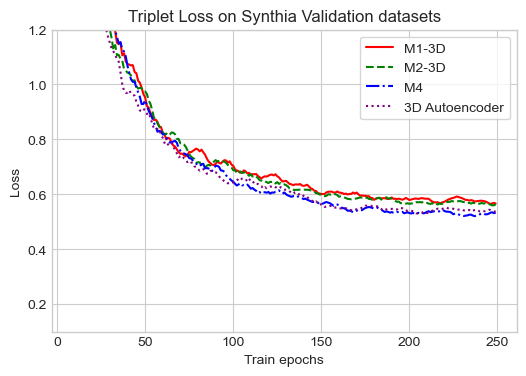

In [70]:
INPUT = 'data/loss.txt'
MA_LENGTH= 10

np.random.seed(113)

data = np.loadtxt(INPUT)

def downsample(x, y, prob = 0.5):
    newx = []
    newy = []
    for idx,elem in enumerate(x):
        if random.uniform(0, 1)<prob:
            newx.append(x[idx])
            newy.append(y[idx])
    return newx, newy

def regularxy(x,y, length=250, shift = 0, start = 0, center= 0, height = 12, fix_shift= 0):
    t = np.arange(0.0, length, 1)
    ty = np.zeros(length)
    n = len(x)
    for tidx in range(length):
        xidx = int(n*(float(tidx)/length))
        if tidx == 0:
            noise = 0
        else:
#             noise = (np.random.random() - center) * (height) /max(1,tidx) + fix_shift + xidx*shift + start
            noise = (np.random.random() - center) * (height) / max(height, tidx)  + fix_shift + xidx*shift + start
        ty[tidx] = y[xidx] + noise
    avgty = moving_average(ty,MA_LENGTH)
    return t, ty, avgty

x = data[::,0]
y = data[::,1]

lastvalues1= []


np.random.seed(144)
ax, ay, avgy = regularxy(x,y, fix_shift = 0.39)
plt.plot(ax[MA_LENGTH-1:], avgy, '-', color='red', label = "M1-3D");

np.random.seed(145)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.38)
plt.plot(ax[MA_LENGTH-1:], avgy, '--', color='green', label='M2-3D');

np.random.seed(146)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.34)
plt.plot(ax[MA_LENGTH-1:], avgy, '-.', color='blue', label='M4');

np.random.seed(147)
ax, ay, avgy = regularxy(x,y, shift= 0, fix_shift=0.35)
plt.plot(ax[MA_LENGTH-1:], avgy, ':', color='purple', label='3D Autoencoder');


plt.legend(loc="upper right", frameon=True)

plt.title('Triplet Loss on Synthia Validation datasets')
plt.xlabel("Train epochs")
plt.ylabel("Loss");
plt.ylim([0.1, 1.2])

plt.savefig('./pics_inq/fig-training-curve-synthia.png')
